In [4]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Import cluster data points from file

In [5]:
data = []
f = open('aggr_clust_set_2.csv')
lines = f.readlines()
f.close
for row in lines:
	elms = row.strip().split('\t')
	#print(elms)
	try:
		data.append([float(elms[0]), float(elms[1])])
	except:
		pass
data = np.array(data)
sze = len(data)
print('len', sze)

len 312


Plot the points

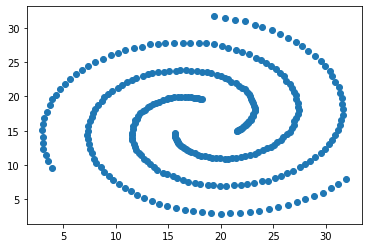

In [6]:
plt.scatter(data[:,0], data[:,1])
plt.show()

Cluster - K means

In [7]:
kmeans = KMeans(n_clusters=3) 
kmeans.fit(data)
clust = kmeans.labels_
print('clust', clust)

clust [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1]


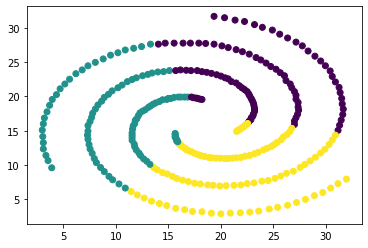

In [8]:
plt.scatter(data[:,0], data[:,1], c=clust)
plt.show()

Build the adjacency matrix (based on distances between points)

In [ ]:
A = np.zeros((sze,sze))
rCut = 2.5
for j in range(sze):
	for i in range(sze):
		d = np.linalg.norm(data[j] - data[i])
		if d < rCut and i != j:
			A[j,i] = 1
			A[i,j] = 1

Plot the adjacency matrix.
Note that there are three connected regions

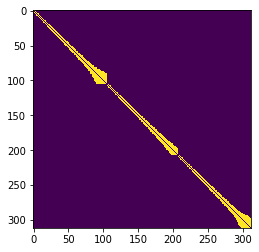

In [9]:
plt.imshow(A)
plt.show()

Build the diagonal Degree matrix (the number of neighboring vertices for each vertex)

In [11]:
Dg = np.zeros((sze,sze))
v = [0] * sze
for n in range(sze):
	nnbrs = np.sum(A[n,:]) 
	v[n] = nnbrs
	Dg[n,n] = nnbrs

GRAPH LAPLACIAN

In [12]:
L = Dg - A

In [13]:
vals, vecs = np.linalg.eig(L)

# sort these based on the eigenvalues
evecs = vecs[:,np.argsort(vals)]
evals = vals[np.argsort(vals)]
print('sorted eigvals', vals)

sorted eigvals [ 2.40942821e+01  2.31362706e+01  2.22869281e+01  2.17824352e+01
  2.13447547e+01  2.06301779e+01  2.01808311e+01  1.97537539e+01
  1.78477467e+01  1.73978619e+01  1.69469339e+01  5.15212872e-16
  1.55639662e-02  6.12641346e-02  1.59784925e-01  2.69601983e-01
  4.48362783e-01  6.37521317e-01  8.41447313e-01  1.12971538e+00
  1.35011935e+00  1.69740015e+00  1.98698684e+00  2.37867705e+00
  2.68195881e+00  2.97993899e+00  3.27988259e+00  3.64223006e+00
  3.91655627e+00  4.08037837e+00  4.20974509e+00  4.31279444e+00
  4.57907357e+00  4.48791310e+00  1.90000000e+01  1.63779630e+01
  1.56814243e+01  1.51812325e+01  1.50660827e+01  1.44761983e+01
  1.41529979e+01  1.40801689e+01  4.92246617e+00  4.98940654e+00
  5.20678810e+00  5.40809053e+00  5.51604689e+00  2.10000000e+01
  2.10000000e+01  1.80000000e+01  1.26988991e+01  1.24327683e+01
  1.20335097e+01  1.22281804e+01  1.21816589e+01  1.13954991e+01
  1.11477341e+01  1.10270970e+01  5.76942997e+00  5.82974778e+00
  6.374328

There are 3 zero eigenvalues. These correspond to the connected regions

In [14]:
# Nr clust is number of (near) zero eigenvectors
s = 0
for v in evals:
	if v < 0.001: s += 1 
k=s
print('NR CONNECTED REGIONS', k) 

NR CONNECTED REGIONS 3


In [15]:
# kmeans on first three vectors with nonzero eigenvalues
kmeans = KMeans(n_clusters=k)
#startAt = 
kmeans.fit(evecs[:,0:s])
clust = kmeans.labels_
print('clust', clust)

clust [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


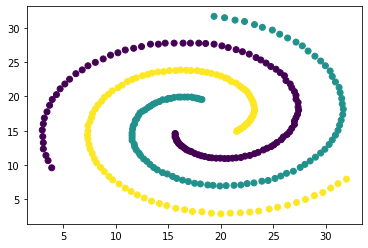

In [16]:
plt.scatter(data[:,0], data[:,1], c=clust)
plt.show()